## Computation

Five examples of pairs of functions ƒ and g such that ƒ is ƒ O(G).

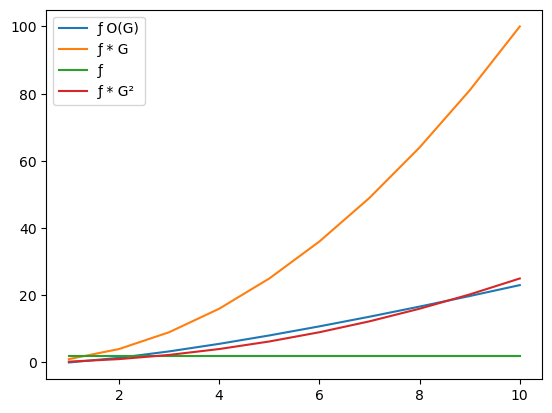

In [2]:
import math
import matplotlib.pyplot as plt

foG = []
fG = []
fC = []
fG2 = []
fGFac = []

for i in range(1, 11):
    foG.append(i * math.log(i))
    fG.append(i ** 2)
    fC.append(2)
    fG2.append((i/2) * (i/2))
    #fGFac.append(math.factorial((i/2)))
    
y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,]
  
# plot lines
plt.plot(y, foG, label = "ƒ O(G)")
plt.plot(y, fG, label = "ƒ * G")
plt.plot(y, fC, label = "ƒ")
plt.plot(y, fG2, label = "ƒ * G²")
#plt.plot(y, fGFac, label = "G!")
plt.legend()
plt.show()

# import image module
from IPython.display import Image

# get the image
Image(url="https://miro.medium.com/max/720/1*j8fUQjaUlmrQEN_udU0_TQ.jpeg", width=600, height=600)


## Exercise 2

Change the above code to only accept inputs that do not contain any 1's.

In [3]:
# State table.
table = {
    ('X', '_'): ['_', 'R', 'T'],
    ('X', '0'): ['0', 'R', 'X'],
    ('X', '1'): ['1', 'R', 'Y'],
    ('Y', '_'): ['_', 'R', 'F'],
    ('Y', '0'): ['0', 'R', 'Y'],
    ('Y', '1'): ['1', 'R', 'X'],
}

# Tape input.
tape = list('0101111')
# Position on tape.
pos = 0
# Initial state is first in table.
state = 'X'



# Keep going while we are not in a halting state.
while state not in ['T', 'F',]:
    # Print the current status.
    print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))
    # Get the row of the table.
    row = table[(state, tape[pos])]
    # Overwrite the symbol.
    tape[pos] = row[0]
    # Move left or right.
    if row[1] == 'R':
        # Put blanks on tape as necessary.
        if pos == len(tape) - 1:
            tape = tape + ['_']
        # Increase position.
        pos = pos + 1
    else:
        # Put blanks on tape as necessary.
        if pos == 0:
            tape = ['_'] + tape
            # The position on the tape has to move with it.
            pos = pos + 1
        # Decrease position.
        pos = pos - 1
    # Update the state.
    state = row[2]

    
# Print the current status.
print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))

X0101111
0X101111
01Y01111
010Y1111
0101X111
01011Y11
010111X1
0101111Y_
0101111_F_


## In class attempt 1 - gates

In [4]:

import qiskit as qk

# Creating Qubits
q = qk.QuantumRegister(2)
# Creating Classical Bits
c = qk.ClassicalRegister(2)

In [5]:
circuit = qk.QuantumCircuit(q, c)

In [6]:
# Hadamard Gate on the first Qubit
circuit.h(q[0])
# CNOT Gate on the first and second Qubits
circuit.cx(q[0], q[1])
# Measuring the Qubits
circuit.measure(q, c)

In [7]:
print (circuit)

      ┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1 


## attempt 2

In [8]:
# importing qiskit
from qiskit import * 
  
# importing plot_histogram to visualize Output
from qiskit.visualization import plot_histogram 
import numpy as np
  
  
def NOT(inp):
  
    # Creating a quantum circuit with a 
    # single qubit and a single classical bit using 
    qc = QuantumCircuit(1, 1)
    qc.reset(0)
  
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, so for
    # an input of 0, we don't need to do anything.
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
    # The x() function is to apply NOT gate on given parameter.
    if inp == '1':
          
        # applying NOT on qubit 0.
        qc.x(0) 
  
    # barrier between input state and gate operation
    qc.barrier()
  
    # Now we've encoded the input,
    # we can do a NOT on it using x
      
    # NOT on |0> converted to |1> and wise verse.
    qc.x(0) 
  
    # barrier between gate operation and measurement
    qc.barrier()
  
    # Finally, we extract the |0⟩/|1⟩ output of
    # the qubit q[0] and encode it in the bit c[0]
    qc.measure(0, 0)
      
    # to visualize
    qc.draw('mpl') 
  
    # To run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
      
    # Since the output will be deterministic,
    # so we can use just a single shot to get it
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output
  
# Sending input to NOT function
for inp in ['0', '1']:
    qc, out = NOT(inp)
      
    print('NOT with input', inp, 'gives output', out)
    display(qc.draw())
    print('\n')

NOT with input 0 gives output 1


░ ┌───┐ ░ ┌─┐
  q: ─|0>──░─┤ X ├─░─┤M├
           ░ └───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0



NOT with input 1 gives output 0


┌───┐ ░ ┌───┐ ░ ┌─┐
  q: ─|0>─┤ X ├─░─┤ X ├─░─┤M├
          └───┘ ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0

## attempt 3

In [9]:
from qiskit import QuantumRegister,ClassicalRegister,Aer,execute
import Our_Qiskit_Functions as oq

# Initializing backend simulators to visualize circuits
S_simulator = Aer.backends(name='statevector_simulator')[0]
Q_simulator = Aer.backends(name='qasm_simulator')[0]
# Creating quantum registers to hold quibits
q = QuantumRegister(2)
# Creating classical registers to hzold bits
c = ClassicalRegister(2)
# Create a quantum circuit with these registers
qc=quantumCircuit(q,c)

ModuleNotFoundError: No module named 'Our_Qiskit_Functions'